## Illustration

In [1]:
import gudhi
print("Current gudhi version:", gudhi.__version__)

Current gudhi version: 3.8.0


In [2]:
%matplotlib inline

In [3]:
from gudhi.wasserstein.barycenter import lagrangian_barycenter as bary
from gudhi.persistence_graphical_tools import plot_persistence_diagram

import numpy as np
import matplotlib.pyplot as plt

C:\Users\Seungyun\anaconda3\lib\site-packages\ot\backend.py:2998: UserWarning: To use TensorflowBackend, you need to activate the tensorflow numpy API. You can activate it by running: 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
  register_backend(TensorflowBackend())


### Example 

In [4]:
diag1 = np.array([[0., 1.], [0, 2], [1, 2], [1.32, 1.87], [0.7, 1.2]])
diag2 = np.array([[0, 1.5], [0.5, 2], [1.2, 2], [1.3, 1.8], [0.4, 0.8]])
diag3 = np.array([[0.2, 1.1], [0.1, 2.2], [1.3, 2.1], [0.5, 0.9], [0.6, 1.1]])

diags = [diag1, diag2, diag3]

usetex mode requires ghostscript.


Text(0.5, 1.0, 'Set of 3 persistence diagrams')

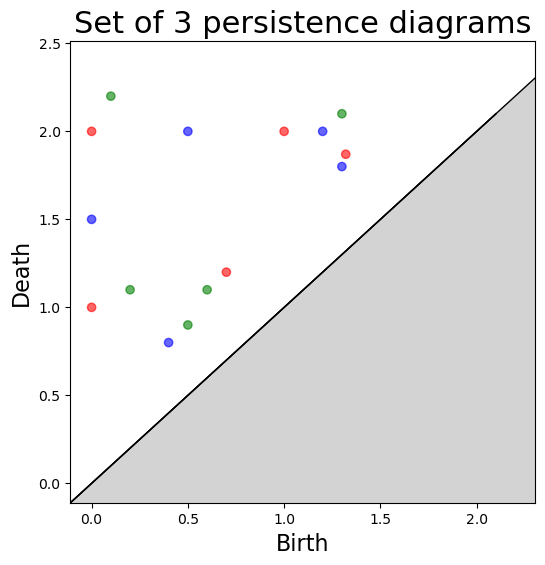

In [5]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
colors=['r', 'b', 'g']
for diag, c in zip(diags, colors):
    plot_persistence_diagram(diag, axes=ax, colormap=c)
ax.set_title("Set of 3 persistence diagrams", fontsize=22)

In [6]:
b, log = bary(diags, init=0, verbose=True)

In [7]:
print("Energy reached by this estimation of the barycenter: E=%.2f." %log['energy'])
print("Convergenced made after %s steps." %log['nb_iter'])

Energy reached by this estimation of the barycenter: E=0.47.
Convergenced made after 2 steps.


In [8]:
G = log['groupings']

def proj_on_diag(x):
    return ((x[1]+x[0]) / 2, (x[1]+x[0])/2)

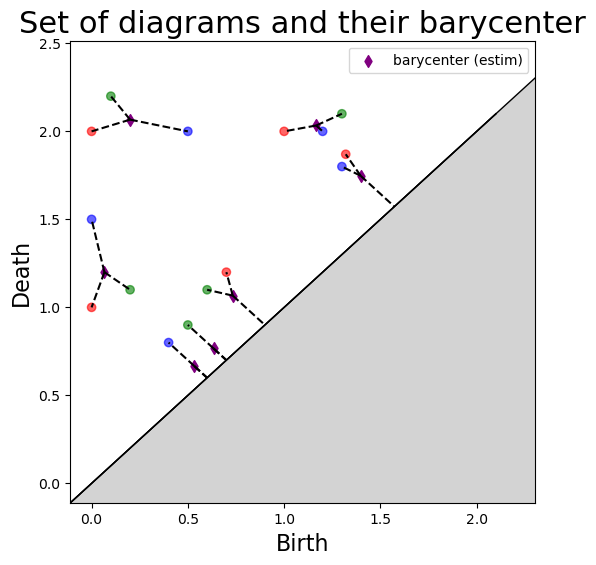

In [9]:
fig = plt.figure(figsize=(6,6))
ax =fig.add_subplot(111)
colors = ['r','b','g']

for diag, c in zip(diags, colors):
    plot_persistence_diagram(diag,axes=ax, colormap=c)
    
def plot_bary(b, diags, groupings, axes):
    for i in range(len(diags)):
        indices = G[i]
        n_i = len(diags[i])
        
        for (y_j, x_i_j) in indices:
            y = b[y_j]
            
            if y[0] != y[1]:
                if x_i_j >= 0:
                    x = diags[i][x_i_j]
                else:
                    x = proj_on_diag(y)
                ax.plot([y[0],x[0]], [y[1],x[1]], c='black', linestyle='dashed')

    ax.scatter(b[:,0], b[:,1], color='purple', marker='d', label="barycenter (estim)")
    ax.legend()
    ax.set_title("Set of diagrams and their barycenter", fontsize=22)

plot_bary(b, diags, G, axes=ax)

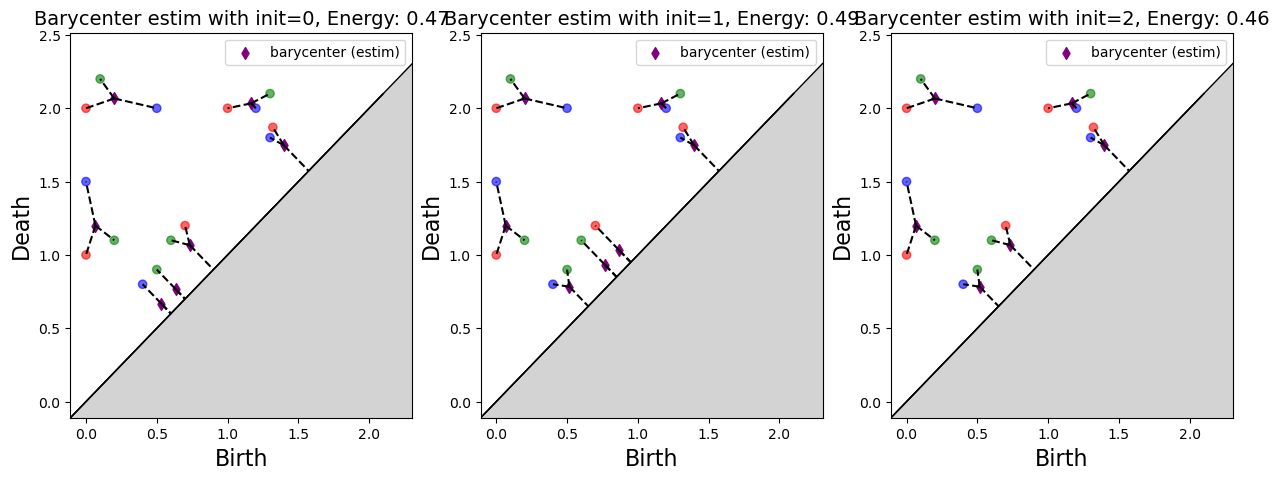

In [13]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

colors = ['r','b','g']

for i,ax in enumerate(axs):
    for diag, c in zip(diags, colors):
        plot_persistence_diagram(diag, axes=ax, colormap=c)
        
    b,log = bary(diags, init=i, verbose=True)
    e = log['energy']
    G = log['groupings']
           
    plot_bary(b, diags, groupings=G, axes=ax)
    ax.set_title('Barycenter estim with init=%s, Energy: %.2f' %(i,e), fontsize=14)